In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

file1 = r"C:\Users\mnkan\Downloads\Backdoor_Malware.pcap.csv"
file2 = r"C:\Users\mnkan\Downloads\Backdoor_Malware 2.pcap.csv"
file3 = r"C:\Users\mnkan\Downloads\Labeled_Backdoor_Malware.csv"

## Loading the Dataset

In [25]:
df1 = pd.read_csv(file1)
print(df1.head())

   Header_Length  Protocol Type  Time_To_Live        Rate  fin_flag_number  \
0           13.2             17         111.8   21.654112              0.0   
1           11.2             17          63.5  134.621809              0.0   
2           13.6             17          65.6  211.662495              0.0   
3           24.8              6          84.4  155.707333              0.0   
4           10.4             17         118.3  105.440687              0.0   

   syn_flag_number  rst_flag_number  psh_flag_number  ack_flag_number  \
0              0.0              0.0              0.0              0.3   
1              0.1              0.0              0.0              0.0   
2              0.1              0.0              0.0              0.2   
3              0.0              0.0              0.4              0.7   
4              0.0              0.0              0.0              0.1   

   ece_flag_number  ...  LLC  Tot sum  Min   Max    AVG         Std  Tot size  \
0          

## Handling Missing Values

In [26]:
# Check for missing values
print(df1.isnull().sum())

# Option 1: Drop rows with missing values
df1 = df1.dropna()

# Option 2: Fill missing values with the column's mean (for numerical data)
df1.fillna(df1.mean(), inplace=True)

Header_Length      0
Protocol Type      0
Time_To_Live       0
Rate               0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IGMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Variance           0
dtype: int64


## Removing columns which has zeroes

In [27]:
# Identify columns with all zeros
cols_to_drop = df1.columns[df1.eq(0).all()]

# Drop the identified columns
df1 = df1.drop(cols_to_drop, axis=1)

print(df1)

      Header_Length  Protocol Type  Time_To_Live        Rate  fin_flag_number  \
0              13.2             17        111.80   21.654112            0.000   
1              11.2             17         63.50  134.621809            0.000   
2              13.6             17         65.60  211.662495            0.000   
3              24.8              6         84.40  155.707333            0.000   
4              10.4             17        118.30  105.440687            0.000   
...             ...            ...           ...         ...              ...   
3213           14.4             17        130.20   32.324049            0.000   
3214           24.0              6        106.40   53.370862            0.000   
3215           26.0              6         83.10   59.725034            0.000   
3216           24.4              6         57.60   73.735374            0.000   
3217           23.5              6        103.75   27.576507            0.125   

      syn_flag_number  rst_

## Data Scaling with MinMaxScaler and StandardScaler

In [28]:
#Load the dataset
df2 = pd.read_csv(file2)

# Selecting numeric columns for scaling (specify column names if needed)
numeric_features = df2.select_dtypes(include=['float64', 'int64']).columns
print(f"Numeric features selected for scaling: {numeric_features}")

# Apply MinMaxScaler
min_max_scaler = MinMaxScaler()
df2_minmax_scaled = df2.copy()
df2_minmax_scaled[numeric_features] = min_max_scaler.fit_transform(df2[numeric_features])

# Display the result of MinMaxScaler
print("Data after MinMax Scaling:")
print(df2_minmax_scaled.head())

# Apply StandardScaler
standard_scaler = StandardScaler()
df2_standard_scaled = df2.copy()
df2_standard_scaled[numeric_features] = standard_scaler.fit_transform(df2[numeric_features])

# Display the result of StandardScaler
print("Data after Standard Scaling:")
print(df2_standard_scaled.head())

Numeric features selected for scaling: Index(['Header_Length', 'Protocol Type', 'Time_To_Live', 'Rate',
       'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'IRC', 'TCP', 'UDP',
       'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max',
       'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Variance'],
      dtype='object')
Data after MinMax Scaling:
   Header_Length  Protocol Type  Time_To_Live      Rate  fin_flag_number  \
0       0.302632       1.000000      0.357746  0.000018              0.0   
1       0.236842       1.000000      0.130986  0.000109              0.0   
2       0.315789       1.000000      0.140845  0.000172              0.0   
3       0.684211       0.352941      0.229108  0.000126              0.0   
4       0.210526       1.000000      0.388263  0.000085              0.0   

   syn_flag_number  rst_flag_number  

## PCA Dimensionality Reduction and Explained Variance Analysis

Explained Variance Ratio (10 components): [0.25497889 0.1180686  0.08098232 0.07791554 0.05873764 0.05521224
 0.04643473 0.03516092 0.03086686 0.02958669]


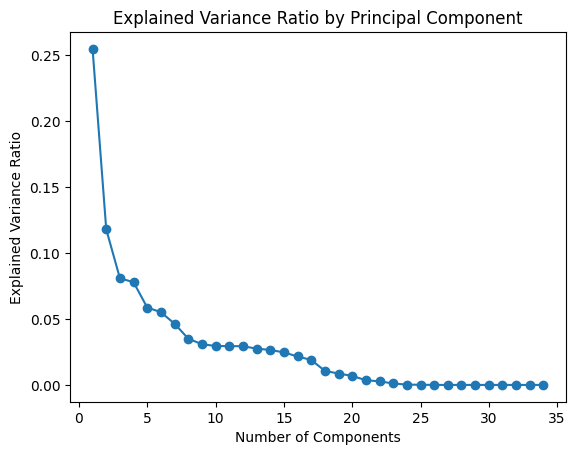

In [29]:
pca_fixed = PCA(n_components=10)
data_pca_fixed = pca_fixed.fit_transform(df2_standard_scaled)  # Using the standardized data

# Print explained variance ratio for the fixed number of components
print("Explained Variance Ratio (10 components):", pca_fixed.explained_variance_ratio_)

# Apply PCA without specifying the number of components to find optimal number
pca = PCA()
pca.fit(df2_standard_scaled)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio   

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

## Splitting the Dataset into Training and Testing Sets

In [30]:
# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Assuming 5% contamination
labels = iso_forest.fit_predict(df2_standard_scaled)

# Add the Labels column to the dataset
df2['Labels'] = labels
df2['Labels'] = df2['Labels'].apply(lambda x: 1 if x == -1 else 0)  # 1: Malicious, 0: Normal

# Analyze the target column
target_distribution = df2['Labels'].value_counts()
print("Distribution of Labels:")
print(target_distribution)

Distribution of Labels:
Labels
0    3057
1     161
Name: count, dtype: int64


## Anomaly Detection Using Isolation Forest

In [31]:
# Load the split datasets
X_train = pd.read_csv("C:\\Users\\mnkan\\Downloads\\X_train.csv")
X_test = pd.read_csv("C:\\Users\\mnkan\\Downloads\\X_test.csv")
y_train = pd.read_csv("C:\\Users\\mnkan\\Downloads\\y_train.csv")
y_test = pd.read_csv("C:\\Users\\mnkan\\Downloads\\y_test.csv")

# Check the data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())

X_train shape: (2574, 34)
X_test shape: (644, 34)
y_train distribution:
 Labels
0         2445
1          129
Name: count, dtype: int64
y_test distribution:
 Labels
0         612
1          32
Name: count, dtype: int64


## Splitting the Dataset

In [32]:
#load the dataset
df3 = pd.read_csv(file3)

# Add the Labels column to classify as malicious (1) or normal (0)
df3['Labels'] = labels
df3['Labels'] = df3['Labels'].apply(lambda x: 1 if x == -1 else 0)  # -1 is anomaly, so 1 for malicious

# Split the dataset into features (X) and target (y)
X = df3.drop(columns=['Labels'])  # Features (all columns except 'Labels')
y = df3['Labels']  # Target column

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print confirmation and dataset shapes
print("Data split and saved successfully!")
print("Shapes of datasets:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())

Data split and saved successfully!
Shapes of datasets:
X_train: (2574, 34) X_test: (644, 34)
y_train distribution:
 Labels
0    2445
1     129
Name: count, dtype: int64
y_test distribution:
 Labels
0    612
1     32
Name: count, dtype: int64


## Preparing Data for Model Training

In [33]:
# Separate features and labels
X = df3.drop('Labels', axis=1)
y = df3['Labels']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2574, 34)
y_train shape: (2574,)
X_test shape: (644, 34)
y_test shape: (644,)


## Model Training and Evaluation for Backdoor Malware Dataset
##### This code trains and evaluates multiple machine learning models on the Backdoor Malware dataset,
##### including Logistic Regression, Perceptron, Random Forest, and Feedforward Neural Network (MLP).
##### The models are evaluated based on Accuracy, Recall, Precision, and F1-score.

In [37]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    ("Logistic Regression", LogisticRegression(random_state=42, max_iter=1000, solver='liblinear', C=0.1)),
    ("Perceptron", Perceptron(random_state=42, max_iter=300)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Feedforward NN", MLPClassifier(random_state=42, max_iter=300))
}

results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append((name, accuracy, recall, precision, f1))


# Print the results
print("Results of 4 models on the backdoor malware dataset\n")
for row in results:
    print(f'{row[0]:<20}: Accuracy = {row[1]:.4f}, Recall = {row[2]:.4f}, Precision = {row[3]:.4f}, F1 = {row[4]:.4f}')

Results of 4 models on the backdoor malware dataset

Random Forest       : Accuracy = 0.9767, Recall = 0.6923, Precision = 0.7200, F1 = 0.7059
Feedforward NN      : Accuracy = 0.8913, Recall = 0.3846, Precision = 0.1562, F1 = 0.2222
Perceptron          : Accuracy = 0.9550, Recall = 0.2692, Precision = 0.4118, F1 = 0.3256
Logistic Regression : Accuracy = 0.9705, Recall = 0.3846, Precision = 0.7692, F1 = 0.5128
